# Seaborn

Seaborn其實是在matplotlib的基礎上進行了更高級的API封裝，從而使得作圖更加容易，在大多數情況下使用seaborn就能做出很具有吸引力的圖，
而使用matplotlib就能製作具有更多特色的圖。
應該把Seaborn視為matplotlib的補充，而不是替代物。
同時它能高度兼容numpy與pandas數據結構以及scipy與statsmodels等統計模式。
掌握seaborn能很大程度幫助我們更高效的觀察數據與圖表，並且更加深入了解它們。

資料來源： 
https://zhuanlan.zhihu.com/p/24464836

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#參數
#a : Series, 1d-array, or list.
#bins : argument for matplotlib hist(), or None, optional #直方圖數量設定
#hist : bool, optional #是否顯示直方圖
#kde : bool, optional #是否顯示核密度圖
#rug : bool, optional #控制是否顯示觀測的小細條
#fit : random variable object, optional #控制擬合的參數分佈
#{hist, kde, rug, fit}_kws : dictionaries, optional

### 直方圖 hist

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(color_codes=True)#顏色設定

np.random.seed(sum(map(ord, "distributions")))

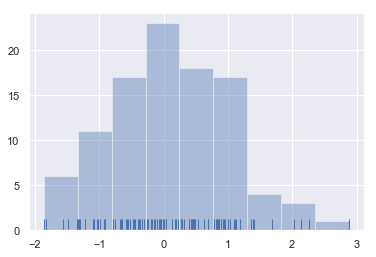

In [4]:
x = np.random.normal(size=100)
sns.distplot(x, kde=False, rug=True);#kde=False關閉KDE,rug表示在x軸上顯示觀測小細條

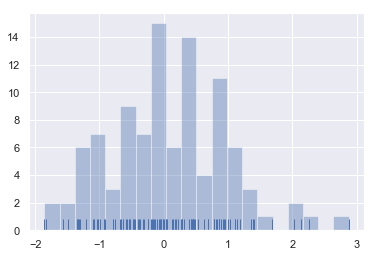

In [5]:
sns.distplot(x, bins=20, kde=False, rug=True);#bins 設定直條的數量。


### Kernel density estimaton核密度估計


核密度估計是在概率論中用來估計未知的密度函數，屬於非參數檢驗方法之一。 
由於核密度估計方法不利用有關數據分佈的先驗知識，對數據分佈不附加任何假定，
是一種從數據樣本本身出發研究數據分佈特徵的方法，因而，在統計學理論和應用領域均受到高度的重視。

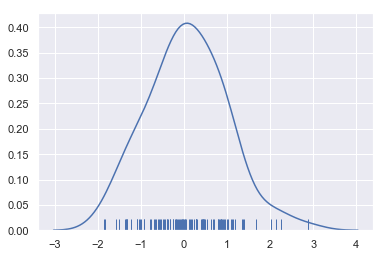

In [6]:
sns.distplot(x, hist=False, rug=True);#關閉直方图，開啟rug細條。

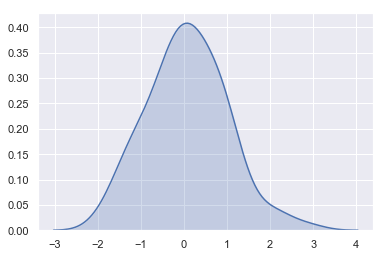

In [7]:
sns.kdeplot(x, shade=True);#shade控制陰影


### Fitting parametric distributions擬合參數分佈


可以利用distplot() 把數據擬合成參數分佈的圖形並且觀察它們之間的差距,再運用fit來進行參數控制。

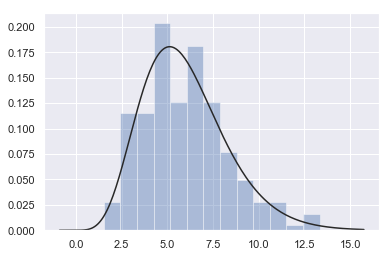

In [8]:
x = np.random.gamma(6, size=200)#生成gamma分布的數據
sns.distplot(x, kde=False, fit=stats.gamma);#fit擬合

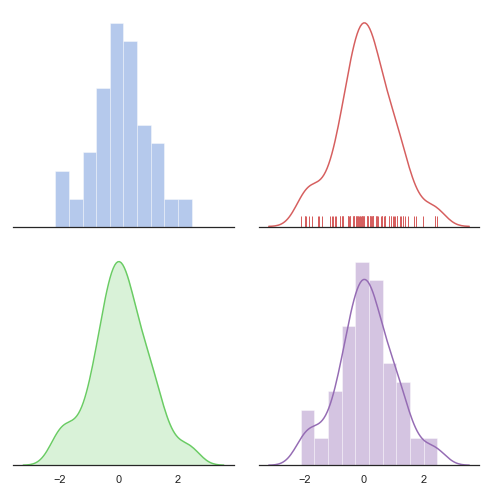

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])


# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

### 長條圖 Barplot

seaborn的barplot()利用矩陣條的高度反映數值變量的集中趨勢，
以及使用errorbar功能（差棒圖）來估計變量之間的差值統計。
請謹記bar plot展示的是某種變量分佈的平均值，
當需要精確觀察每類變量的分佈趨勢，
boxplot與violinplot往往是更好的選擇。


In [10]:
#參數
#x, y, hue : names of variables in data or vector data, optional #设置x,y以及顏色控制的變量
#data : DataFrame, array, or list of arrays, optional #設定輸入的資料集
####
#order, hue_order : lists of strings, optional 控制變量繪圖的順序
#Order to plot the categorical levels in, otherwise the levels are inferred from the data objects.
###
#estimator : callable that maps vector -> scalar, optional
##設置對每類變量的計算函數，默認為平均值，可修改為max、median、max等
###
#ax : matplotlib Axes, optional #設置子圖位置。
#orient : “v” | “h”, optional #控制绘图的方向，水平或者竖直
#capsize : float, optional #設置誤差棒帽條的寬度





In [16]:
tips = sns.load_dataset("tips") #內建資料集
print(tips)
print(tips.info())

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
6          8.77  2.00    Male     No   Sun  Dinner     2
7         26.88  3.12    Male     No   Sun  Dinner     4
8         15.04  1.96    Male     No   Sun  Dinner     2
9         14.78  3.23    Male     No   Sun  Dinner     2
10        10.27  1.71    Male     No   Sun  Dinner     2
11        35.26  5.00  Female     No   Sun  Dinner     4
12        15.42  1.57    Male     No   Sun  Dinner     2
13        18.43  3.00    Male     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
15        21.58  3.92    Male     No   Sun  Dinner     2
16        10.33  1.67  Female  

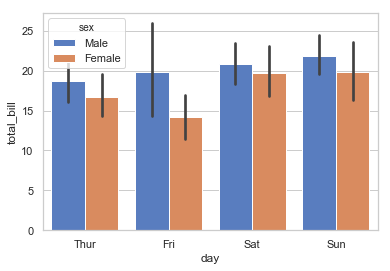

In [13]:
import seaborn as sns
sns.set_style("whitegrid")
#x軸為分類變量day,y軸為數值變量total_bill，利用顏色再對sex分類
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips) 

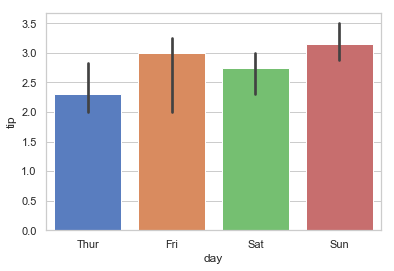

In [17]:
from numpy import median
ax = sns.barplot(x="day", y="tip", data=tips, estimator=median)
#設置中位數為計算函數，注意y軸已顯示為median


### 計數圖 Countplot

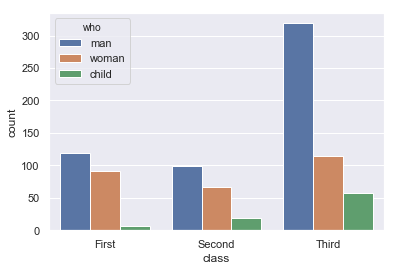

In [18]:
import seaborn as sns
sns.set(style="darkgrid")
titanic = sns.load_dataset("titanic") #titanic經典數據集，帶有登船人員的信息
#數據集class代表三等艙位，who代表人員分類，男女小孩，對每一類人數計數
ax = sns.countplot(x="class", hue="who", data=titanic) 

### 練習

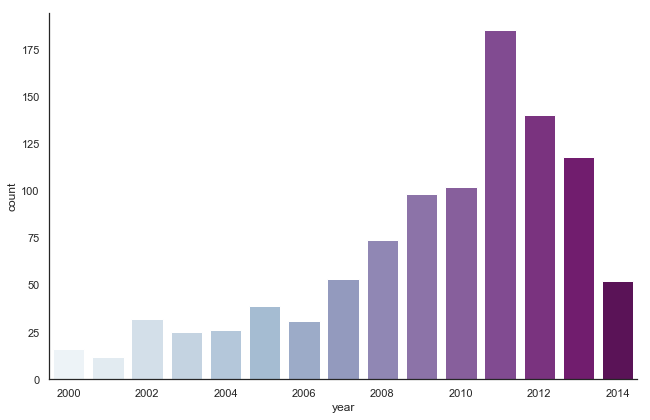

In [19]:
import numpy as np
import seaborn as sns
sns.set(style="white") #設置繪圖背景

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Make a range of years to show categories with no observations
years = np.arange(2000, 2015) #生成2000-2015連續整數

# Draw a count plot to show the number of planets discovered each year
#选择調色盤，繪圖參數與順序，factorplot一種類別變量的集合工作方式
g = sns.factorplot(x="year", data=planets, kind="count",
                   palette="BuPu", size=6, aspect=1.5, order=years)
g.set_xticklabels(step=2) #x軸標籤間距2年